# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from datetime import date

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Today's date
today = date.today()

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# OpenWeather API url
url = "http://api.openweathermap.org/data/2.5/weather?"





## Generate Cities List

In [3]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)


622

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [4]:
#Create arrays for each piece of info I need from the API call
names = []
temps = []
winds = []
humids = []
clouds = []
lat = []

for city in cities: 
    # Add + 1 because index starts at 0
    city_number = (cities.index(city)) + 1
    #city = city.capitalize()
    print("---------------------")
    print(f"Processing city #{city_number}: {city.capitalize()}")
    # Adjust multi-word urls so that api will call to correct city
    adjusted_city = city.replace(" ", "%20")
    # Customized url
    query_url = f"{url}appid={api_key}&units=imperial&q={adjusted_city}"
    weather_response = requests.get(query_url)
    weather_json = weather_response.json()
    # Handle key error exception (If city doesn't exist in OpenWeather db)
    try:
        print(f"url: {query_url}")
        temps.append(weather_json['main']['temp_max'])
        names.append(weather_json['name'])
        winds.append(weather_json['wind']['speed'])
        humids.append(weather_json['main']['humidity'])
        clouds.append(weather_json['clouds']['all'])
        lat.append(weather_json['coord']['lat'])
    except KeyError:
        print(f"{city.capitalize()} doesn't exist at OpenWeather API")
    

    print(f"Finished processing {city.capitalize()}")
    # 1 call per second
    time.sleep(1)


---------------------
Processing city #1: Ituni
url: http://api.openweathermap.org/data/2.5/weather?appid=7fd4a4a24b5be08f6fe06eaaafc64a46&units=imperial&q=ituni
Ituni doesn't exist at OpenWeather API
Finished processing Ituni
---------------------
Processing city #2: Mariinsk
url: http://api.openweathermap.org/data/2.5/weather?appid=7fd4a4a24b5be08f6fe06eaaafc64a46&units=imperial&q=mariinsk
Finished processing Mariinsk
---------------------
Processing city #3: Chokurdakh
url: http://api.openweathermap.org/data/2.5/weather?appid=7fd4a4a24b5be08f6fe06eaaafc64a46&units=imperial&q=chokurdakh
Finished processing Chokurdakh
---------------------
Processing city #4: Voloshka
url: http://api.openweathermap.org/data/2.5/weather?appid=7fd4a4a24b5be08f6fe06eaaafc64a46&units=imperial&q=voloshka
Finished processing Voloshka
---------------------
Processing city #5: Namibe
url: http://api.openweathermap.org/data/2.5/weather?appid=7fd4a4a24b5be08f6fe06eaaafc64a46&units=imperial&q=namibe
Finished pro

---------------------
Processing city #42: Boulder
url: http://api.openweathermap.org/data/2.5/weather?appid=7fd4a4a24b5be08f6fe06eaaafc64a46&units=imperial&q=boulder
Finished processing Boulder
---------------------
Processing city #43: Samusu
url: http://api.openweathermap.org/data/2.5/weather?appid=7fd4a4a24b5be08f6fe06eaaafc64a46&units=imperial&q=samusu
Samusu doesn't exist at OpenWeather API
Finished processing Samusu
---------------------
Processing city #44: Korla
url: http://api.openweathermap.org/data/2.5/weather?appid=7fd4a4a24b5be08f6fe06eaaafc64a46&units=imperial&q=korla
Korla doesn't exist at OpenWeather API
Finished processing Korla
---------------------
Processing city #45: Avarua
url: http://api.openweathermap.org/data/2.5/weather?appid=7fd4a4a24b5be08f6fe06eaaafc64a46&units=imperial&q=avarua
Finished processing Avarua
---------------------
Processing city #46: Bengkulu
url: http://api.openweathermap.org/data/2.5/weather?appid=7fd4a4a24b5be08f6fe06eaaafc64a46&units=impe

---------------------
Processing city #83: Hvammstangi
url: http://api.openweathermap.org/data/2.5/weather?appid=7fd4a4a24b5be08f6fe06eaaafc64a46&units=imperial&q=hvammstangi
Hvammstangi doesn't exist at OpenWeather API
Finished processing Hvammstangi
---------------------
Processing city #84: Regidor
url: http://api.openweathermap.org/data/2.5/weather?appid=7fd4a4a24b5be08f6fe06eaaafc64a46&units=imperial&q=regidor
Finished processing Regidor
---------------------
Processing city #85: Calbuco
url: http://api.openweathermap.org/data/2.5/weather?appid=7fd4a4a24b5be08f6fe06eaaafc64a46&units=imperial&q=calbuco
Finished processing Calbuco
---------------------
Processing city #86: Victoria
url: http://api.openweathermap.org/data/2.5/weather?appid=7fd4a4a24b5be08f6fe06eaaafc64a46&units=imperial&q=victoria
Finished processing Victoria
---------------------
Processing city #87: Qaanaaq
url: http://api.openweathermap.org/data/2.5/weather?appid=7fd4a4a24b5be08f6fe06eaaafc64a46&units=imperial&q=q

---------------------
Processing city #123: Luau
url: http://api.openweathermap.org/data/2.5/weather?appid=7fd4a4a24b5be08f6fe06eaaafc64a46&units=imperial&q=luau
Finished processing Luau
---------------------
Processing city #124: Mys shmidta
url: http://api.openweathermap.org/data/2.5/weather?appid=7fd4a4a24b5be08f6fe06eaaafc64a46&units=imperial&q=mys%20shmidta
Mys shmidta doesn't exist at OpenWeather API
Finished processing Mys shmidta
---------------------
Processing city #125: Port macquarie
url: http://api.openweathermap.org/data/2.5/weather?appid=7fd4a4a24b5be08f6fe06eaaafc64a46&units=imperial&q=port%20macquarie
Finished processing Port macquarie
---------------------
Processing city #126: Iquitos
url: http://api.openweathermap.org/data/2.5/weather?appid=7fd4a4a24b5be08f6fe06eaaafc64a46&units=imperial&q=iquitos
Finished processing Iquitos
---------------------
Processing city #127: Hella
url: http://api.openweathermap.org/data/2.5/weather?appid=7fd4a4a24b5be08f6fe06eaaafc64a46&un

---------------------
Processing city #163: Leshukonskoye
url: http://api.openweathermap.org/data/2.5/weather?appid=7fd4a4a24b5be08f6fe06eaaafc64a46&units=imperial&q=leshukonskoye
Finished processing Leshukonskoye
---------------------
Processing city #164: Upernavik
url: http://api.openweathermap.org/data/2.5/weather?appid=7fd4a4a24b5be08f6fe06eaaafc64a46&units=imperial&q=upernavik
Finished processing Upernavik
---------------------
Processing city #165: Agogo
url: http://api.openweathermap.org/data/2.5/weather?appid=7fd4a4a24b5be08f6fe06eaaafc64a46&units=imperial&q=agogo
Finished processing Agogo
---------------------
Processing city #166: Taseyevo
url: http://api.openweathermap.org/data/2.5/weather?appid=7fd4a4a24b5be08f6fe06eaaafc64a46&units=imperial&q=taseyevo
Finished processing Taseyevo
---------------------
Processing city #167: Vanimo
url: http://api.openweathermap.org/data/2.5/weather?appid=7fd4a4a24b5be08f6fe06eaaafc64a46&units=imperial&q=vanimo
Finished processing Vanimo
--

---------------------
Processing city #203: Louisbourg
url: http://api.openweathermap.org/data/2.5/weather?appid=7fd4a4a24b5be08f6fe06eaaafc64a46&units=imperial&q=louisbourg
Louisbourg doesn't exist at OpenWeather API
Finished processing Louisbourg
---------------------
Processing city #204: Lethem
url: http://api.openweathermap.org/data/2.5/weather?appid=7fd4a4a24b5be08f6fe06eaaafc64a46&units=imperial&q=lethem
Finished processing Lethem
---------------------
Processing city #205: San andres
url: http://api.openweathermap.org/data/2.5/weather?appid=7fd4a4a24b5be08f6fe06eaaafc64a46&units=imperial&q=san%20andres
Finished processing San andres
---------------------
Processing city #206: Richards bay
url: http://api.openweathermap.org/data/2.5/weather?appid=7fd4a4a24b5be08f6fe06eaaafc64a46&units=imperial&q=richards%20bay
Finished processing Richards bay
---------------------
Processing city #207: Balkhash
url: http://api.openweathermap.org/data/2.5/weather?appid=7fd4a4a24b5be08f6fe06eaaafc

---------------------
Processing city #243: Kahului
url: http://api.openweathermap.org/data/2.5/weather?appid=7fd4a4a24b5be08f6fe06eaaafc64a46&units=imperial&q=kahului
Finished processing Kahului
---------------------
Processing city #244: Hirschaid
url: http://api.openweathermap.org/data/2.5/weather?appid=7fd4a4a24b5be08f6fe06eaaafc64a46&units=imperial&q=hirschaid
Finished processing Hirschaid
---------------------
Processing city #245: Mahajanga
url: http://api.openweathermap.org/data/2.5/weather?appid=7fd4a4a24b5be08f6fe06eaaafc64a46&units=imperial&q=mahajanga
Finished processing Mahajanga
---------------------
Processing city #246: Asosa
url: http://api.openweathermap.org/data/2.5/weather?appid=7fd4a4a24b5be08f6fe06eaaafc64a46&units=imperial&q=asosa
Finished processing Asosa
---------------------
Processing city #247: Assiros
url: http://api.openweathermap.org/data/2.5/weather?appid=7fd4a4a24b5be08f6fe06eaaafc64a46&units=imperial&q=assiros
Finished processing Assiros
--------------

---------------------
Processing city #284: Puerto escondido
url: http://api.openweathermap.org/data/2.5/weather?appid=7fd4a4a24b5be08f6fe06eaaafc64a46&units=imperial&q=puerto%20escondido
Finished processing Puerto escondido
---------------------
Processing city #285: Balakhta
url: http://api.openweathermap.org/data/2.5/weather?appid=7fd4a4a24b5be08f6fe06eaaafc64a46&units=imperial&q=balakhta
Finished processing Balakhta
---------------------
Processing city #286: Grand gaube
url: http://api.openweathermap.org/data/2.5/weather?appid=7fd4a4a24b5be08f6fe06eaaafc64a46&units=imperial&q=grand%20gaube
Finished processing Grand gaube
---------------------
Processing city #287: Viamao
url: http://api.openweathermap.org/data/2.5/weather?appid=7fd4a4a24b5be08f6fe06eaaafc64a46&units=imperial&q=viamao
Finished processing Viamao
---------------------
Processing city #288: Bolshegrivskoye
url: http://api.openweathermap.org/data/2.5/weather?appid=7fd4a4a24b5be08f6fe06eaaafc64a46&units=imperial&q=bolsh

---------------------
Processing city #323: Hihifo
url: http://api.openweathermap.org/data/2.5/weather?appid=7fd4a4a24b5be08f6fe06eaaafc64a46&units=imperial&q=hihifo
Hihifo doesn't exist at OpenWeather API
Finished processing Hihifo
---------------------
Processing city #324: Vestmannaeyjar
url: http://api.openweathermap.org/data/2.5/weather?appid=7fd4a4a24b5be08f6fe06eaaafc64a46&units=imperial&q=vestmannaeyjar
Finished processing Vestmannaeyjar
---------------------
Processing city #325: Tajumulco
url: http://api.openweathermap.org/data/2.5/weather?appid=7fd4a4a24b5be08f6fe06eaaafc64a46&units=imperial&q=tajumulco
Finished processing Tajumulco
---------------------
Processing city #326: Meyungs
url: http://api.openweathermap.org/data/2.5/weather?appid=7fd4a4a24b5be08f6fe06eaaafc64a46&units=imperial&q=meyungs
Meyungs doesn't exist at OpenWeather API
Finished processing Meyungs
---------------------
Processing city #327: Geraldton
url: http://api.openweathermap.org/data/2.5/weather?appid

---------------------
Processing city #363: Pacific grove
url: http://api.openweathermap.org/data/2.5/weather?appid=7fd4a4a24b5be08f6fe06eaaafc64a46&units=imperial&q=pacific%20grove
Finished processing Pacific grove
---------------------
Processing city #364: Inongo
url: http://api.openweathermap.org/data/2.5/weather?appid=7fd4a4a24b5be08f6fe06eaaafc64a46&units=imperial&q=inongo
Finished processing Inongo
---------------------
Processing city #365: Gushikawa
url: http://api.openweathermap.org/data/2.5/weather?appid=7fd4a4a24b5be08f6fe06eaaafc64a46&units=imperial&q=gushikawa
Finished processing Gushikawa
---------------------
Processing city #366: Mackay
url: http://api.openweathermap.org/data/2.5/weather?appid=7fd4a4a24b5be08f6fe06eaaafc64a46&units=imperial&q=mackay
Finished processing Mackay
---------------------
Processing city #367: Naarden
url: http://api.openweathermap.org/data/2.5/weather?appid=7fd4a4a24b5be08f6fe06eaaafc64a46&units=imperial&q=naarden
Finished processing Naarden


---------------------
Processing city #404: Luganville
url: http://api.openweathermap.org/data/2.5/weather?appid=7fd4a4a24b5be08f6fe06eaaafc64a46&units=imperial&q=luganville
Finished processing Luganville
---------------------
Processing city #405: Man
url: http://api.openweathermap.org/data/2.5/weather?appid=7fd4a4a24b5be08f6fe06eaaafc64a46&units=imperial&q=man
Finished processing Man
---------------------
Processing city #406: Guanica
url: http://api.openweathermap.org/data/2.5/weather?appid=7fd4a4a24b5be08f6fe06eaaafc64a46&units=imperial&q=guanica
Finished processing Guanica
---------------------
Processing city #407: Lira
url: http://api.openweathermap.org/data/2.5/weather?appid=7fd4a4a24b5be08f6fe06eaaafc64a46&units=imperial&q=lira
Finished processing Lira
---------------------
Processing city #408: Cape coast
url: http://api.openweathermap.org/data/2.5/weather?appid=7fd4a4a24b5be08f6fe06eaaafc64a46&units=imperial&q=cape%20coast
Finished processing Cape coast
---------------------

---------------------
Processing city #445: Anito
url: http://api.openweathermap.org/data/2.5/weather?appid=7fd4a4a24b5be08f6fe06eaaafc64a46&units=imperial&q=anito
Finished processing Anito
---------------------
Processing city #446: Maceio
url: http://api.openweathermap.org/data/2.5/weather?appid=7fd4a4a24b5be08f6fe06eaaafc64a46&units=imperial&q=maceio
Finished processing Maceio
---------------------
Processing city #447: Porto novo
url: http://api.openweathermap.org/data/2.5/weather?appid=7fd4a4a24b5be08f6fe06eaaafc64a46&units=imperial&q=porto%20novo
Finished processing Porto novo
---------------------
Processing city #448: Coolum beach
url: http://api.openweathermap.org/data/2.5/weather?appid=7fd4a4a24b5be08f6fe06eaaafc64a46&units=imperial&q=coolum%20beach
Finished processing Coolum beach
---------------------
Processing city #449: Klaksvik
url: http://api.openweathermap.org/data/2.5/weather?appid=7fd4a4a24b5be08f6fe06eaaafc64a46&units=imperial&q=klaksvik
Finished processing Klaksvi

---------------------
Processing city #484: Betsiamites
url: http://api.openweathermap.org/data/2.5/weather?appid=7fd4a4a24b5be08f6fe06eaaafc64a46&units=imperial&q=betsiamites
Finished processing Betsiamites
---------------------
Processing city #485: Neiafu
url: http://api.openweathermap.org/data/2.5/weather?appid=7fd4a4a24b5be08f6fe06eaaafc64a46&units=imperial&q=neiafu
Finished processing Neiafu
---------------------
Processing city #486: Pinhao
url: http://api.openweathermap.org/data/2.5/weather?appid=7fd4a4a24b5be08f6fe06eaaafc64a46&units=imperial&q=pinhao
Finished processing Pinhao
---------------------
Processing city #487: Payo
url: http://api.openweathermap.org/data/2.5/weather?appid=7fd4a4a24b5be08f6fe06eaaafc64a46&units=imperial&q=payo
Finished processing Payo
---------------------
Processing city #488: Kosonsoy
url: http://api.openweathermap.org/data/2.5/weather?appid=7fd4a4a24b5be08f6fe06eaaafc64a46&units=imperial&q=kosonsoy
Finished processing Kosonsoy
--------------------

---------------------
Processing city #526: Khonuu
url: http://api.openweathermap.org/data/2.5/weather?appid=7fd4a4a24b5be08f6fe06eaaafc64a46&units=imperial&q=khonuu
Khonuu doesn't exist at OpenWeather API
Finished processing Khonuu
---------------------
Processing city #527: Balaipungut
url: http://api.openweathermap.org/data/2.5/weather?appid=7fd4a4a24b5be08f6fe06eaaafc64a46&units=imperial&q=balaipungut
Finished processing Balaipungut
---------------------
Processing city #528: Nizwa
url: http://api.openweathermap.org/data/2.5/weather?appid=7fd4a4a24b5be08f6fe06eaaafc64a46&units=imperial&q=nizwa
Finished processing Nizwa
---------------------
Processing city #529: Dawson
url: http://api.openweathermap.org/data/2.5/weather?appid=7fd4a4a24b5be08f6fe06eaaafc64a46&units=imperial&q=dawson
Finished processing Dawson
---------------------
Processing city #530: Turukhansk
url: http://api.openweathermap.org/data/2.5/weather?appid=7fd4a4a24b5be08f6fe06eaaafc64a46&units=imperial&q=turukhansk
Fi

---------------------
Processing city #567: Anzio
url: http://api.openweathermap.org/data/2.5/weather?appid=7fd4a4a24b5be08f6fe06eaaafc64a46&units=imperial&q=anzio
Finished processing Anzio
---------------------
Processing city #568: Arawa
url: http://api.openweathermap.org/data/2.5/weather?appid=7fd4a4a24b5be08f6fe06eaaafc64a46&units=imperial&q=arawa
Finished processing Arawa
---------------------
Processing city #569: Pangai
url: http://api.openweathermap.org/data/2.5/weather?appid=7fd4a4a24b5be08f6fe06eaaafc64a46&units=imperial&q=pangai
Finished processing Pangai
---------------------
Processing city #570: Kimbe
url: http://api.openweathermap.org/data/2.5/weather?appid=7fd4a4a24b5be08f6fe06eaaafc64a46&units=imperial&q=kimbe
Finished processing Kimbe
---------------------
Processing city #571: Sechelt
url: http://api.openweathermap.org/data/2.5/weather?appid=7fd4a4a24b5be08f6fe06eaaafc64a46&units=imperial&q=sechelt
Finished processing Sechelt
---------------------
Processing city #57

---------------------
Processing city #608: Brahmapuri
url: http://api.openweathermap.org/data/2.5/weather?appid=7fd4a4a24b5be08f6fe06eaaafc64a46&units=imperial&q=brahmapuri
Brahmapuri doesn't exist at OpenWeather API
Finished processing Brahmapuri
---------------------
Processing city #609: Vila franca do campo
url: http://api.openweathermap.org/data/2.5/weather?appid=7fd4a4a24b5be08f6fe06eaaafc64a46&units=imperial&q=vila%20franca%20do%20campo
Finished processing Vila franca do campo
---------------------
Processing city #610: Los aquijes
url: http://api.openweathermap.org/data/2.5/weather?appid=7fd4a4a24b5be08f6fe06eaaafc64a46&units=imperial&q=los%20aquijes
Finished processing Los aquijes
---------------------
Processing city #611: Isiro
url: http://api.openweathermap.org/data/2.5/weather?appid=7fd4a4a24b5be08f6fe06eaaafc64a46&units=imperial&q=isiro
Finished processing Isiro
---------------------
Processing city #612: Shieli
url: http://api.openweathermap.org/data/2.5/weather?appid=7

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [6]:
# Create dataframe with api data
weather_df = pd.DataFrame([names, temps, winds, humids, clouds, lat])
weather_df = weather_df.transpose()
weather_df.columns = ['City Name', 'Max Temperature (F)', 'Wind speed (mph)', \
                      'Humidity (%)', 'Cloudiness', 'Latitude']

# Create csv output
weather_df.to_csv('../output/weather.csv', )

# Display dataframe
weather_df

,City Name,Max Temperature (F),Wind speed (mph),Humidity (%),Cloudiness,Latitude
0,Mariinsk,41.98,10.16,71,56,56.21
1,Chokurdakh,27.04,12.86,88,97,70.62
2,Voloshka,37.77,7.34,88,100,61.33
3,Namibe,64.93,6.58,82,53,-15.19
4,Punta Arenas,41,28.86,77,0,-53.16
5,Watertown,46.4,8.05,93,90,44.9
6,Severo-Kurilsk,48.01,14.41,96,100,50.68
7,Butaritari,84.87,2.44,59,100,3.07
8,Ribeira Grande,69.54,8.68,68,100,38.52
9,Lithakia,75.2,8.05,73,40,37.72


In [18]:
# Some basic stats about the dataframe for reference
weather_df.describe()

,City Name,Max Temperature (F),Wind speed (mph),Humidity (%),Cloudiness,Latitude
count,560,560.0,560.0,560,560,560.00
unique,559,347.0,285.0,87,74,538.00
top,Victoria,84.2,4.7,93,0,52.47
freq,2,13.0,34.0,38,137,2.00


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

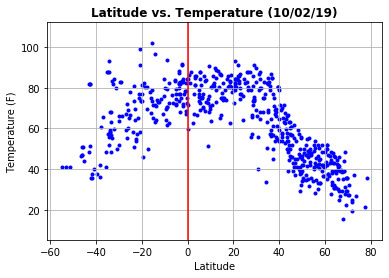

In [19]:
plt.scatter(weather_df['Latitude'], weather_df['Max Temperature (F)'], c = 'blue', marker = '.')
plt.xlabel("Latitude")
plt.ylabel("Temperature (F)")
plt.title(f"Latitude vs. Temperature ({today.strftime('%m/%d/%y')})", weight = 'bold')
plt.vlines(0, min(weather_df['Max Temperature (F)'] - 10), max(weather_df['Max Temperature (F)'] + 10), linestyles='solid', colors = 'red')
plt.grid()
plt.ylim(min(weather_df['Max Temperature (F)'] - 10), max(weather_df['Max Temperature (F)'] + 10))
plt.savefig("../images/temperature.png")

#### Latitude vs. Humidity Plot

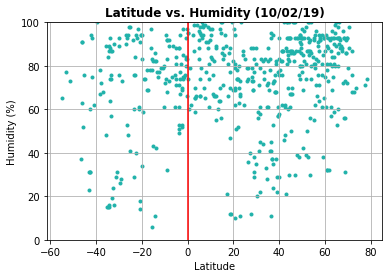

In [20]:
plt.scatter(weather_df['Latitude'], weather_df['Humidity (%)'], c = 'lightseagreen', marker = '.')
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title(f"Latitude vs. Humidity ({today.strftime('%m/%d/%y')})", weight = 'bold')
plt.vlines(0, 0,100, linestyles='solid', colors = 'red')
plt.ylim(0,100)
plt.grid()
plt.savefig("../images/humidity.png")

#### Latitude vs. Cloudiness Plot

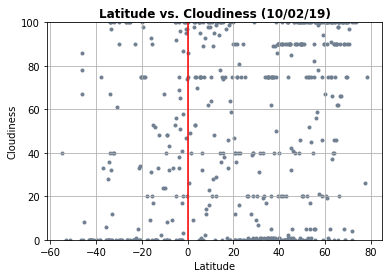

In [21]:
plt.scatter(weather_df['Latitude'], weather_df['Cloudiness'], c = 'slategrey', marker = '.')
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.title(f"Latitude vs. Cloudiness ({today.strftime('%m/%d/%y')})", weight = 'bold')
plt.vlines(0, 0,100, linestyles='solid', colors = 'r')
plt.ylim(0,100)
plt.grid()
plt.savefig("../images/cloudiness.png")

#### Latitude vs. Wind Speed Plot

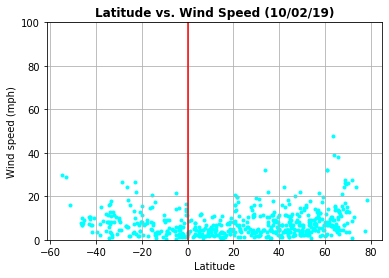

In [22]:
plt.scatter(weather_df['Latitude'], weather_df['Wind speed (mph)'], c = 'cyan', marker = '.')
plt.xlabel("Latitude")
plt.ylabel("Wind speed (mph)")
plt.title(f"Latitude vs. Wind Speed ({today.strftime('%m/%d/%y')})", weight = 'bold')
plt.vlines(0, 0,100, linestyles='solid', colors = 'red')
plt.ylim(0,100)
plt.grid()
plt.savefig("../images/wind_speed.png")